In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import data 

In [21]:
data = pd.read_csv(r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [6]:
data2 = data.head()

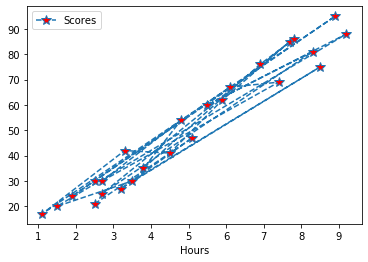

In [7]:
data.plot("Hours","Scores",linestyle = "--",marker = "*",markersize = "10",markerfacecolor = "red")

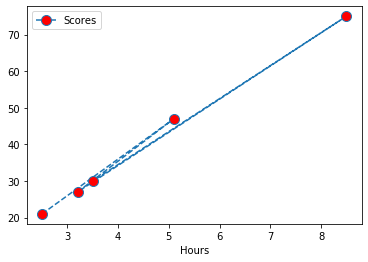

In [8]:
data2.plot("Hours","Scores",linestyle = "--",marker = "o",markersize = "10",markerfacecolor = "red")

## So, from both the graphes it it clear that there is a positive relation between hours studied by the students and scores scored by them.

In [9]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


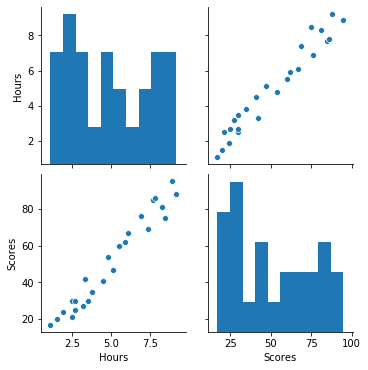

In [12]:
sns.pairplot(data)

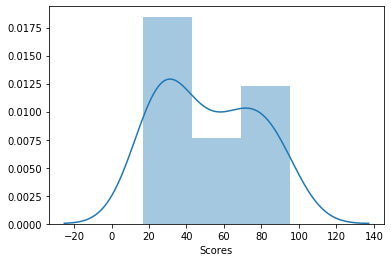

In [13]:
sns.distplot(data["Scores"])

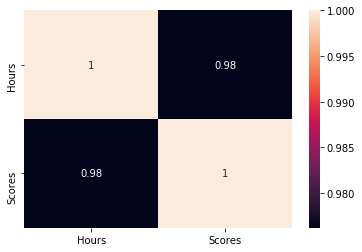

In [14]:
sns.heatmap(data.corr(),annot = True)

## The heat graph shows perfect positive correlation between the Hours and the scores obtained by the students.

In [15]:
from sklearn import linear_model


In [16]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## The Training complete.

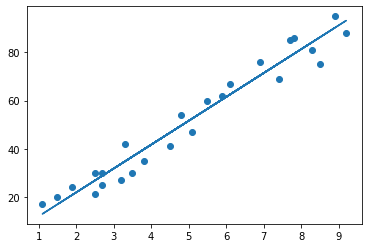

In [23]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [24]:
print(X_test) 
y_pred = regressor.predict(X_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [26]:
hours = [[19.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = [[19.25]]
Predicted Score = 192.79829729379776


In [27]:

from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.18385989900298
